In [130]:
import pandas as pd
x=pd.read_csv('train_x.csv')

In [131]:
y=pd.read_csv('train_y.csv')
#y['Label'].fillna(0,inplace=True)

In [31]:
y

,ID,Label
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
79995,79996,0.0
79996,79997,0.0
79997,79998,0.0
79998,79999,0.0


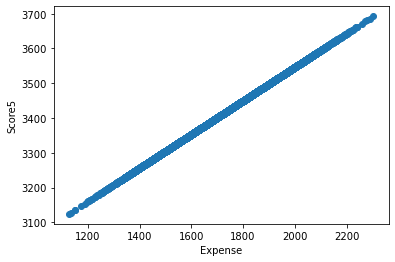

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x['Expense'],x['Score5'])
plt.xlabel('Expense')
plt.ylabel('Score5')
plt.show()

Variable Expense and score5 shows linear relation and follows the realtion Score5=Expense*0.483146+2580
I am filling NA values using this relation

In [132]:
x['Score5'].fillna(x['Expense']*0.483146+2580,inplace=True)  
x['Expense'].fillna((x['Score5']-2580)/0.483146,inplace=True)  

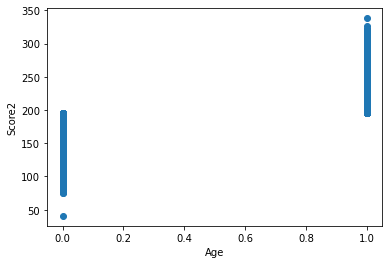

In [6]:
plt.scatter(x['Age'],x['Score2'])
plt.xlabel('Age')
plt.ylabel('Score2')
plt.show()

Score 2 and age also shows a relation so using this relation to fill missing values of age

In [133]:
x['Age'].fillna(x['Score2']/194.9,inplace=True)


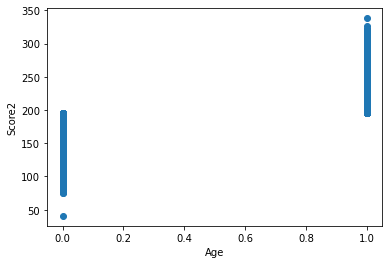

In [134]:
x['Age'].fillna(0,inplace=True)
x['Age']=x['Age'].astype('int')
plt.scatter(x['Age'],x['Score2'])
plt.xlabel('Age')
plt.ylabel('Score2')
plt.show()

Filling all the other numerical values with Median

In [135]:
numerical=['Expense','Income','Age','Score1','Score2',"Score3",'Score4','Score5']
for i in numerical:
    med = x[i].median()
    x[i].fillna(-9999,inplace=True)

In [10]:
x.isna().sum()

ID                    0
Expense               0
Income                0
Loan type          2011
Occupation type    1859
Age                   0
Score1                0
Score2                0
Score3                0
Score4                0
Score5                0
dtype: int64

In [ ]:
x.to_csv('train_cleaned.csv')

In [136]:
import numpy as np
#x['Occupation type'].fillna(x['Occupation type'].apply(lambda v: np.random.choice(['X','Y','Z'])),inplace=True)
df2=pd.get_dummies(x['Occupation type'], prefix='Occupation')
df3=pd.get_dummies(x['Loan type'], prefix='Loan')
x = pd.concat([x,df2,df3],axis=1)

In [ ]:
cat_cols = ['Loan type','Occupation type']
import category_encoders as ce
target_enc = ce.CatBoostEncoder(cols = cat_cols)
target_enc.fit(x[cat_cols],y['Label'])
train_enc = target_enc.transform(x[cat_cols])
#test_enc = target_enc.transform(x[cat_cols])

x = x.drop(cat_cols,axis=1)
x = pd.concat([x,train_enc],axis=1)


In [137]:
x['Label']=y['Label']
x.dropna(inplace=True)
y=x['Label']
x.drop(['Label'], axis = 1,inplace=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [116]:
x

,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5,Occupation_X,Occupation_Y,Occupation_Z,Loan_A,Loan_B
0,1830.943788,14767.28013,B,Y,1,0.016885,205.196182,22.521523,600.911200,3464.613291,0,1,0,0,1
1,1645.302546,15272.26775,B,Y,0,0.240375,194.266317,5.349117,600.888816,3374.921455,0,1,0,0,1
2,1555.026392,17482.49734,A,Y,0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0,1,0,1,0
3,1681.222341,16257.66493,A,Y,0,0.303909,191.228965,6.971750,602.447203,3392.275849,0,1,0,1,0
4,1777.648916,16316.29914,B,X,1,-9999.000000,224.074728,11.218489,605.947340,3438.864083,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,1693.157180,16780.78702,A,Y,0,0.215657,194.759062,6.210195,600.748132,3398.042233,0,1,0,1,0
79996,1923.617480,14910.36890,B,Y,0,0.201837,186.252458,15.425841,600.855069,3509.388221,0,1,0,0,1
79997,1711.147154,15962.25945,A,Y,1,0.226396,196.098150,8.161353,601.360722,3406.734018,0,1,0,1,0
79998,1673.822523,15525.27413,B,Z,0,0.101090,186.390184,3.381393,596.750750,3388.700770,0,0,1,0,1


In [138]:
x.drop(['Occupation type','Loan type'], axis = 1,inplace=True)
x.drop(['ID'], axis = 1,inplace=True)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_probab = model.predict_proba(X_test)[::,-1]
print(confusion_matrix((y_probab>0.23).astype(int),y_test))
print(classification_report((y_probab>0.23).astype(int),y_test))

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=300,max_depth=20,learning_rate=0.1,alpha=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[[14148    55]
 [  217   800]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14203
         1.0       0.94      0.79      0.85      1017

    accuracy                           0.98     15220
   macro avg       0.96      0.89      0.92     15220
weighted avg       0.98      0.98      0.98     15220



In [119]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=300,max_depth=20,learning_rate=0.1,alpha=10)
# model = LGBMClassifier(**params)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test))

[[13463    57]
 [  205   761]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13668
         1.0       0.79      0.93      0.85       818

    accuracy                           0.98     14486
   macro avg       0.89      0.96      0.92     14486
weighted avg       0.98      0.98      0.98     14486



In [122]:
from sklearn.metrics import classification_report, confusion_matrix
y_probab = clf.predict_proba(X_test)[::,-1]
print(confusion_matrix((y_probab>0.35).astype(int),y_test))
print(classification_report((y_probab>0.35).astype(int),y_test))

[[13442   187]
 [   78   779]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13629
           1       0.81      0.91      0.85       857

    accuracy                           0.98     14486
   macro avg       0.90      0.95      0.92     14486
weighted avg       0.98      0.98      0.98     14486



In [ ]:
X_train

## Feature Importance

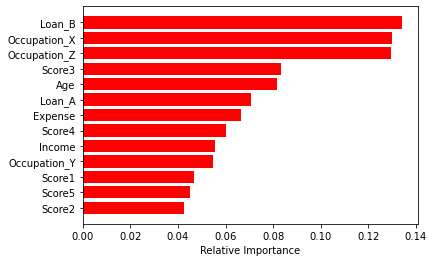

In [196]:
feat = X_train.columns
imp = clf.feature_importances_
indices = np.argsort(imp)

plt.barh(range(len(indices)), imp[indices], color='red')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# K-Fold and randomizedsearchcv

In [ ]:
dtrain = lgbm.Dataset(data=X_train[features], label=X_train[target_name], feature_name=features)
dval = lgbm.Dataset(data=X_val[features], label=X_val[target_name], feature_name=features)
model = lgbm.train(
    params=params,
    train_set=dtrain,
    num_boost_round=other_params["num_boost_round"],
    valid_sets=(dtrain, dval),
    early_stopping_rounds=other_params["early_stopping_rounds"],
    verbose_eval=other_params["verbose_eval"],
)        
    
best_iteration = model.best_iteration
train_pred=model.predict(X_train[features], num_iteration=best_iteration)
validation_pred=model.predict(X_val[features], num_iteration=best_iteration)
test_pred=model.predict(X_test[features], num_iteration=best_iteration)

In [139]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score

clf_xgb = XGBClassifier()
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(X))
score = 0.0
for train_index, test_index in folds.split(x):
    X_train, X_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += f1_score(y_test, results[test_index])
score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 18.4min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 11.5min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.1min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.9min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 11.0min finished


In [142]:
for clf in estimators:
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_pred,y_test))
    

[[13457    31]
 [  131   866]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13588
         1.0       0.87      0.97      0.91       897

    accuracy                           0.99     14485
   macro avg       0.93      0.98      0.95     14485
weighted avg       0.99      0.99      0.99     14485

[[13452    36]
 [  142   855]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13594
         1.0       0.86      0.96      0.91       891

    accuracy                           0.99     14485
   macro avg       0.93      0.97      0.95     14485
weighted avg       0.99      0.99      0.99     14485

[[13450    38]
 [  160   837]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13610
         1.0       0.84      0.96      0.89       875

    accuracy                           0.99     14485
   macro avg       0.92      0.97  

[[13469    19]
 [   65   932]]


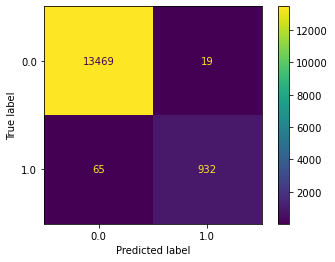

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13534
         1.0       0.93      0.98      0.96       951

    accuracy                           0.99     14485
   macro avg       0.97      0.99      0.98     14485
weighted avg       0.99      0.99      0.99     14485



In [202]:
clf=estimators[3]
y_pred=clf.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  
print(classification_report(y_pred,y_test))

## Estimator[3] is giving the best performance so we select this 

# Submission

In [187]:
test=pd.read_csv('test_x.csv')

In [180]:
test

,ID_Test,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1780.356350,16691.51975,B,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,2,1939.547945,14782.20015,A,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,3,1721.876977,14035.40923,B,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,4,1681.268538,15179.79116,A,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,5,1654.495928,15187.09603,A,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1706.038470,15388.07701,B,Z,0,0.080845,192.079189,1.100830,595.979156,3404.265778
19996,19997,1712.503287,17979.80449,B,X,1,-0.025641,228.686449,11.394893,600.071790,3407.389229
19997,19998,1873.089949,17804.74995,B,Y,1,0.068247,236.021469,4.680945,599.961820,3484.976043
19998,19999,1740.115898,17071.77542,B,X,1,0.032874,231.595185,12.147134,601.404096,3420.730153


In [188]:
df2=pd.get_dummies(test['Occupation type'], prefix='Occupation')
df3=pd.get_dummies(test['Loan type'], prefix='Loan')
test = pd.concat([test,df2,df3],axis=1)

In [189]:
test.drop(['Loan type','Occupation type'],axis=1,inplace=True)

In [190]:
test.drop(['ID_Test'],axis=1,inplace=True)

In [191]:
pred_y=clf.predict(test)

In [155]:
pred_y

array([0., 0., 0., ..., 1., 1., 0.])

In [192]:
tes=pd.read_csv('test_x.csv')
submi=pd.DataFrame()
submi['ID_Test']=tes['ID_Test'].copy()


In [193]:
submi['Label']=pred_y

In [194]:
submi.to_csv('pred_y_.csv')

In [200]:
clf.save_model('Model/model_xgb.json')